# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
x_values = [17,51,27,21,36,48,19,26,54,30]
y_values = [10,1,5,9,4,2,9,6,0,3]

In [10]:
df = pd.DataFrame({'age': x_values, 'tardies': y_values})
df.head()

,age,tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

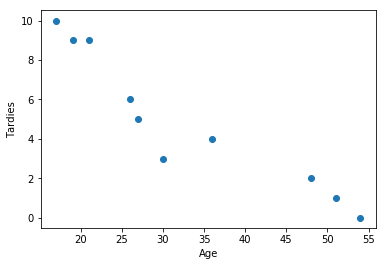

In [12]:
plt.scatter(df["age"],df["tardies"])
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.show()

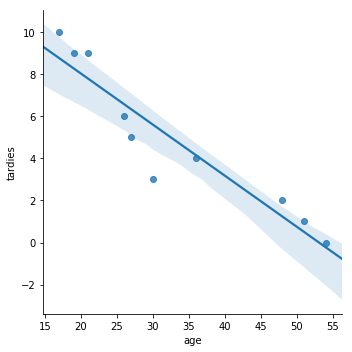

In [13]:
sns.lmplot(data = df, x='age', y= 'tardies') 

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [14]:
#the older you are the earlier you are

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

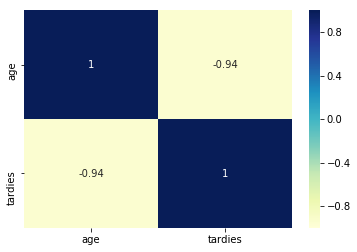

In [18]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap="YlGnBu",annot=True)

In [23]:
X = df["age"]
Y = df["tardies"]
np.cov(X,Y) #?

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [27]:
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           5.57e-05
Time:                        15:43:24   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
Y_predict = results.predict(X)
residuals = Y_predict - Y

Plot your regression model on your scatter plot.

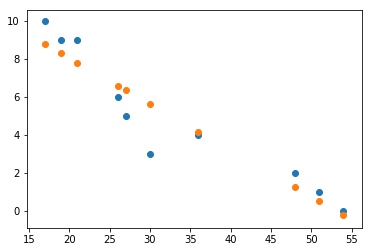

In [37]:
plt.scatter(X["age"],Y) #blue
plt.scatter(X["age"],Y_predict) #orange
plt.show()

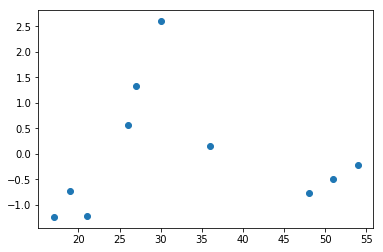

In [35]:
plt.scatter(X["age"],residuals)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [39]:
#we have low p- |t| and high R-squared, our residuals are randomly distributed and we are close to mean 0
# low std error

# [tardies] = 12.88 + -0.24[age]

# there is a negative correlation between age and tardies

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [41]:
vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [42]:
vehicles[["Year","Cylinders","Fuel Barrels/Year","Combined MPG","Fuel Cost/Year","CO2 Emission Grams/Mile"]]

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


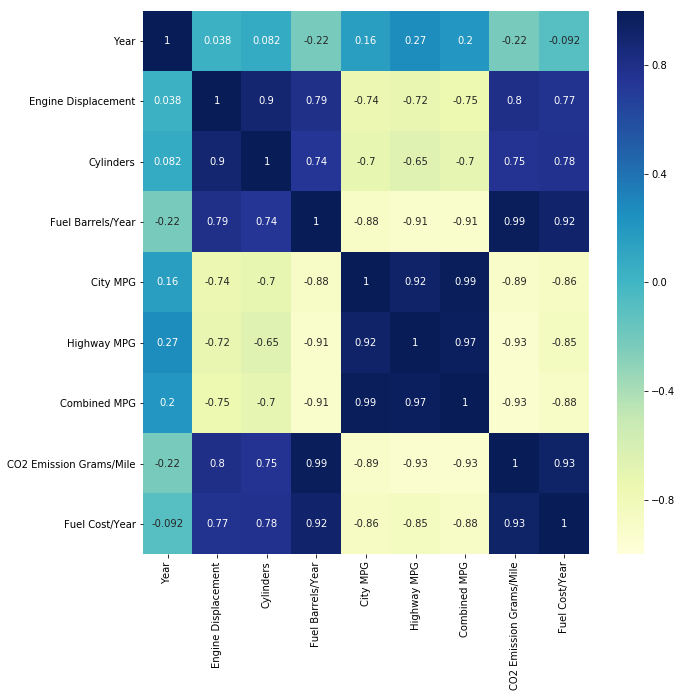

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(vehicles.corr(),vmin=-1,vmax=1,annot=True,cmap="YlGnBu")
plt.show()

In [46]:
#year is not really important to determine CO2 and the rest have either positive or negative correlation

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [47]:
X = vehicles[["Fuel Barrels/Year","Cylinders"]]
Y = vehicles["CO2 Emission Grams/Mile"]

X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.974
Model:                                 OLS   Adj. R-squared:                  0.974
Method:                      Least Squares   F-statistic:                 6.666e+05
Date:                     Sat, 07 Nov 2020   Prob (F-statistic):               0.00
Time:                             16:14:55   Log-Likelihood:            -1.5742e+05
No. Observations:                    35952   AIC:                         3.148e+05
Df Residuals:                        35949   BIC:                         3.149e+05
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.2453      0.418     24.538      0.000       9.427      11.064
Fuel Barrels/Year    25.2793      0.034    747.098      0.000      25.213      25.346
Cylinders             3.4564      0.086     40.136      0.000       3.288       3.625
==============================================================================
Omnibus:                    86224.573   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        813839354.451
Skew:                          24.999   Prob(JB):                         0.00
Kurtosis:                     738.380   Cond. No.                         78.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [48]:
x = [1,3,4,6,8,9,11,14]
y = [1,2,4,4,5,7,8,13]
data = pd.DataFrame({"x":x,"y":y})
data

,x,y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

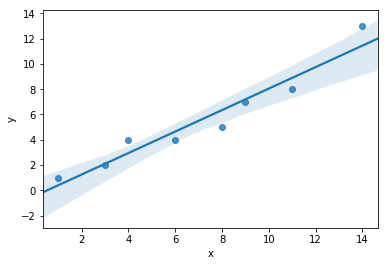

In [50]:
sns.regplot(x="x",y="y",data=data)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [51]:
data["x"].corr(data["y"])

0.9652303546573691

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [53]:
print("x std: ", data["x"].std())
print("y std: ",data["y"].std())

x std:  4.342481186734475
y std:  3.8172540616821107


In [54]:
data.describe()
# medians and means are close to each other which is good, there is no a huge outlier but maybe max values can be removed

,x,y
count,8.000000,8.000000
mean,7.000000,5.500000
std,4.342481,3.817254
min,1.000000,1.000000
25%,3.750000,3.500000
50%,7.000000,4.500000
75%,9.500000,7.250000
max,14.000000,13.000000


In [55]:
X = data["x"]
Y = data["y"]

X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           0.000102
Time:                        16:27:59   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.584      -2.297       1.418
x              0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [57]:
data_adj= data.drop(7)

In [58]:
data_adj.describe() # mean of y and median got closer as well as std(s)

,x,y
count,7.000000,7.000000
mean,6.000000,4.428571
std,3.559026,2.507133
min,1.000000,1.000000
25%,3.500000,3.000000
50%,6.000000,4.000000
75%,8.500000,6.000000
max,11.000000,8.000000


In [60]:
X = data_adj["x"]
Y = data_adj["y"]

X = sm.add_constant(X)

model = sm.OLS(Y,X)
results = model.fit()
results.summary() #higher t and R-squared, lower std err

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           0.000264
Time:                        16:30:13   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.556      -0.996       1.642
x              0.6842      0.075      9.127      0.000       0.492       0.877
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.689
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.379
Skew:                           0.284   Prob(JB):                        0.827
Kurtosis:                       2.012   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

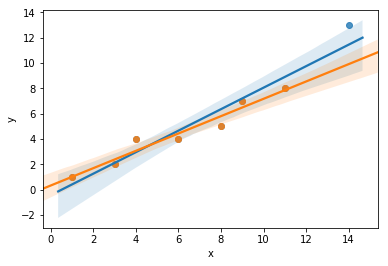

In [63]:
sns.regplot(x="x",y="y",data=data)
sns.regplot(x="x",y="y",data=data_adj)
plt.show()

# the line gets more linear